In [41]:
import pandas as pd
import csv

data = pd.read_csv('cleanFeatures.csv')

In [42]:
data.head()
data.drop(['Unnamed: 0'], axis=1,inplace = True)

In [30]:
data_noID = data.drop(['ProteinID'],axis = 1)

In [40]:
data_noID.head()

,FrequencyA,FrequencyC,FrequencyD,FrequencyE,FrequencyF,FrequencyG,FrequencyH,FrequencyI,FrequencyK,FrequencyL,...,HarmonicCentrality,Local Clustering Coefficient,Modularity,PageRank,SSfractionHelix,SSfractionTurn,SSfractionSheet,BP,CC,MF
0,0.544841,2.569691,-0.913502,-0.860238,-0.624291,0.548421,1.678870,-1.586820,-1.139632,0.101656,...,0.883341,0.883341,0.736007,-0.424373,-0.573348,0.227374,0.227374,-0.566718,-0.185605,-0.601109
1,0.865940,-0.066382,-0.457007,-0.527986,-0.248247,1.866844,0.236912,1.765667,0.455002,-0.974009,...,-0.709971,-0.709971,-0.238547,-0.357133,0.396657,0.037403,0.037403,-0.553693,-1.350813,-1.149322
2,-0.291238,-0.901086,-0.413211,-0.636871,1.107451,-0.488293,-0.018137,1.031476,0.360262,-0.658068,...,0.606558,0.606558,-0.673415,-0.376694,0.276242,0.814701,0.814701,-0.147412,-0.731582,-0.943992
3,0.346813,2.375019,-0.121250,-0.012200,-0.627223,1.105463,-0.468733,-1.497474,-0.786536,-0.640707,...,-0.346774,-0.346774,0.466137,-0.520649,-1.298741,1.110046,1.110046,-0.677024,0.689543,0.247697
4,0.076916,-0.650226,-0.019627,-1.192335,-0.932011,1.265698,0.770537,-0.127167,-1.042019,-1.471888,...,-0.393095,-0.393095,0.436175,1.359952,-0.436386,1.734393,1.734393,-1.013390,-0.532671,0.715993


In [43]:
data.head()

,ProteinID,FrequencyA,FrequencyC,FrequencyD,FrequencyE,FrequencyF,FrequencyG,FrequencyH,FrequencyI,FrequencyK,...,HarmonicCentrality,Local Clustering Coefficient,Modularity,PageRank,SSfractionHelix,SSfractionTurn,SSfractionSheet,BP,CC,MF
0,P00748,0.544841,2.569691,-0.913502,-0.860238,-0.624291,0.548421,1.678870,-1.586820,-1.139632,...,0.883341,0.883341,0.736007,-0.424373,-0.573348,0.227374,0.227374,-0.566718,-0.185605,-0.601109
1,P09622,0.865940,-0.066382,-0.457007,-0.527986,-0.248247,1.866844,0.236912,1.765667,0.455002,...,-0.709971,-0.709971,-0.238547,-0.357133,0.396657,0.037403,0.037403,-0.553693,-1.350813,-1.149322
2,Q9UGJ0,-0.291238,-0.901086,-0.413211,-0.636871,1.107451,-0.488293,-0.018137,1.031476,0.360262,...,0.606558,0.606558,-0.673415,-0.376694,0.276242,0.814701,0.814701,-0.147412,-0.731582,-0.943992
3,Q9Y6Q6,0.346813,2.375019,-0.121250,-0.012200,-0.627223,1.105463,-0.468733,-1.497474,-0.786536,...,-0.346774,-0.346774,0.466137,-0.520649,-1.298741,1.110046,1.110046,-0.677024,0.689543,0.247697
4,Q02962,0.076916,-0.650226,-0.019627,-1.192335,-0.932011,1.265698,0.770537,-0.127167,-1.042019,...,-0.393095,-0.393095,0.436175,1.359952,-0.436386,1.734393,1.734393,-1.013390,-0.532671,0.715993


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_noID)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
principalDf.head()

,principal component 1,principal component 2
0,2.061614,-1.854642
1,-0.535896,-0.702038
2,0.625394,-1.323396
3,3.101221,-0.693870
4,2.828815,-2.294720


In [11]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

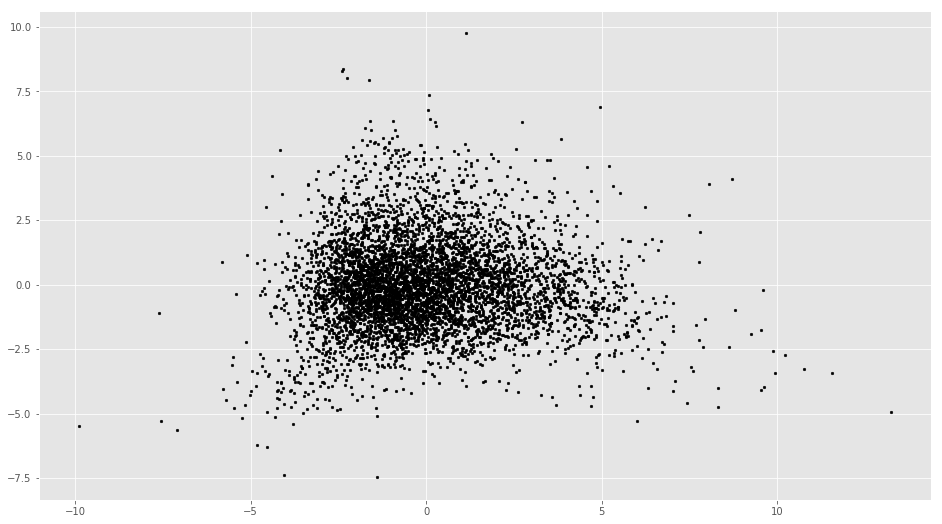

In [12]:
f1 = principalDf['principal component 1'].values
f2 = principalDf['principal component 2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

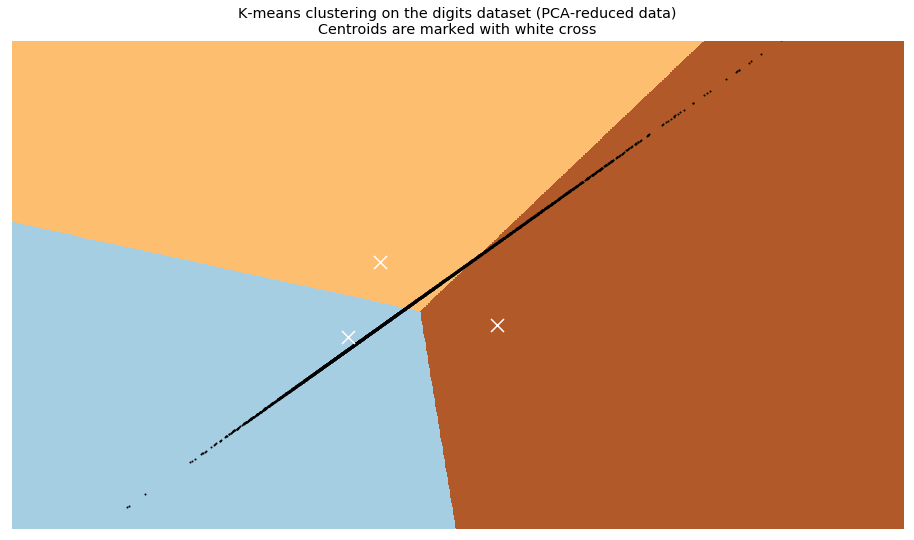

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(principalDf)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = principalDf['principal component 1'].min() - 1, principalDf['principal component 1'].max() + 1
y_min, y_max = principalDf['principal component 2'].min() - 1, principalDf['principal component 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(principalDf['principal component 1'], principalDf['principal component 1'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [38]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = topoFeatures_norm['Gene_ID']
cluster_map['cluster'] = kmeans.labels_

In [43]:
cluster_min = cluster_map['cluster'].min()
cluster_max = cluster_map['cluster'].max()

import networkx as nx
def readInput():
    disease_file  = open("../gene-disease0.TSV", 'r')
    diseases = []
    disease_dic = {}
    componentDic = {}
    for line in disease_file:
        li = line.strip()
        if not li.startswith("#"):
            li2 = li.split(' ',1)
            disease_key = li2[0]
            print ("the key is: "+disease_key)
            disease_list = [l for l in (li2[1]).split('/')]
            length = len(disease_list)
            for i in range(length):
                diseases.append(disease_list[i])
            print (disease_list)
            disease_dic.update({disease_key: disease_list})
    return disease_dic,diseases

disease_dic,diseases=readInput()

    

the key is: adrenalglanddiseases
['3758', '215', '3762', '1589', '1585', '6770', '2516', '6557', '5573', '2778', '7809', '1584', '1586', '51', '1187', '190', '3284', '7157']
the key is: alzheimerdisease
['5663', '23036', '348', '5664', '55103', '10452', '1191', '2629', '2041', '10913', '51435', '4536', '4535', '351', '7305', '4973', '5819', '344558', '1378', '9627', '8301', '23607', '945', '5071', '341', '274', '25902', '9846', '54209']
the key is: aminoacidmetabolisminbornerrors
['445', '383', '2109', '3815', '11234', '388552', '4286', '275', '2110', '6898', '7299', '435', '7306', '5096', '37', '36', '875', '5009', '3257', '84343', '34', '89781', '28976', '10157', '84062', '8546', '26258', '2731', '1585', '2653', '593', '2108', '686', '5053', '1738', '35', '5092', '10165', '2184', '5095', '3141', '5860', '4935', '79803', '594', '1373', '5184', '3242', '3081', '1629', '2639', '27034']
the key is: amyotrophiclateralsclerosis
['6647', '1639', '6311', '57679', '10133', '2521', '998', '229

In [54]:
cluster_disease = [[0 for x in range(70)] for y in range(70)] 

for i in range(cluster_min,cluster_max+1):
    current_cluster = cluster_map[cluster_map.cluster == i]
    current_cluster = list(current_cluster['data_index'])
    y_counter = -1
    for j in disease_dic.values():
        y_counter += 1
        for k in range(len(j)):
            node = int(j[k])
            if(node in current_cluster):
                cluster_disease[i][y_counter] += 1

In [64]:
import operator

predictions = [0 for x in range(70)]

for i in range(70):
    row = cluster_disease[i]
    index, value = max(enumerate(row), key=operator.itemgetter(1))
    predictions[i] = index
    print(str(predictions[i]) + " " + str(value))

56 13
56 8
56 4
56 28
56 1
56 31
26 1
56 14
56 4
56 10
56 3
10 1
56 3
5 1
46 3
56 11
56 2
56 4
56 23
56 7
56 13
56 26
56 22
0 0
0 0
56 19
56 21
56 12
0 0
56 3
56 8
56 11
0 0
56 8
56 5
56 2
41 2
56 5
56 17
12 1
56 32
0 0
56 9
0 0
56 3
56 10
58 2
0 0
56 5
56 3
56 3
56 22
0 0
56 10
56 15
56 17
0 0
56 3
56 5
12 1
56 6
56 16
56 8
56 14
56 19
4 2
61 2
56 10
56 38
56 2


n_digits: 3, 	 n_samples 5743, 	 n_features 37
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.35s	178863	0.009	0.005	0.006	-0.004	0.004	0.076
random   	0.28s	178863	0.009	0.005	0.006	-0.004	0.004	0.076
PCA-based	0.03s	178863	0.008	0.004	0.006	-0.003	0.004	0.060
__________________________________________________________________________________


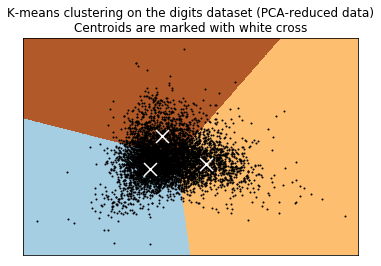

In [33]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data = data_noID.drop('Target',axis=1)

n_samples, n_features = data.shape
n_digits = 3
labels = data_noID['Target']

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
km = kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [44]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data['ProteinID']
cluster_map['cluster'] = km.labels_

In [50]:
cluster0 = cluster_map[cluster_map.cluster == 0]
cluster0_ID = list(cluster0['data_index'])

cluster1 = cluster_map[cluster_map.cluster == 1]
cluster1_ID = list(cluster1['data_index'])

cluster2 = cluster_map[cluster_map.cluster == 2]
cluster2_ID = list(cluster2['data_index'])

TP = 0
FP = 0
FN = 0
for index, row in data.iterrows():
    if((row['Target']==1) and (row['ProteinID'] in cluster0_ID)):
        TP += 1
    if((row['Target']==0) and (row['ProteinID'] in cluster0_ID)):
        FP += 1
    if((row['Target']==1) and (row['ProteinID'] not in cluster0_ID)):
        FN += 1

# print('TP ' + str(TP) + ' FP ' + str(FP) + ' FN ' + str(FN))
F1 = (2*TP)/(2*TP+FP+FN)
print(F1)

TN = len(data) - TP - FP - FN
ACC = (TP+TN) / len(data)
print(ACC)

0.3511450381679389
0.5411805676475709


In [51]:
TP = 0
FP = 0
FN = 0
for index, row in data.iterrows():
    if((row['Target']==1) and (row['ProteinID'] in cluster1_ID)):
        TP += 1
    if((row['Target']==0) and (row['ProteinID'] in cluster1_ID)):
        FP += 1
    if((row['Target']==1) and (row['ProteinID'] not in cluster1_ID)):
        FN += 1

# print('TP ' + str(TP) + ' FP ' + str(FP) + ' FN ' + str(FN))
F1 = (2*TP)/(2*TP+FP+FN)
print(F1)

TN = len(data) - TP - FP - FN
ACC = (TP+TN) / len(data)
print(ACC)

0.29365079365079366
0.6280689535086192


In [52]:
TP = 0
FP = 0
FN = 0
for index, row in data.iterrows():
    if((row['Target']==1) and (row['ProteinID'] in cluster2_ID)):
        TP += 1
    if((row['Target']==0) and (row['ProteinID'] in cluster2_ID)):
        FP += 1
    if((row['Target']==1) and (row['ProteinID'] not in cluster2_ID)):
        FN += 1

# print('TP ' + str(TP) + ' FP ' + str(FP) + ' FN ' + str(FN))
F1 = (2*TP)/(2*TP+FP+FN)
print(F1)

TN = len(data) - TP - FP - FN
ACC = (TP+TN) / len(data)
print(ACC)

0.18667568481569158
0.5812293226536653
